In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [18]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

In [19]:
img_height = 128
img_width = 128
batch_size = 32

In [20]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
color_mode='grayscale',
image_size=(img_height, img_width),
batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
val_dir,
color_mode='grayscale',
image_size=(img_height, img_width),
batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
color_mode='grayscale',
image_size=(img_height, img_width),
batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [21]:
train_ds.class_names

['NORMAL', 'PNEUMONIA']

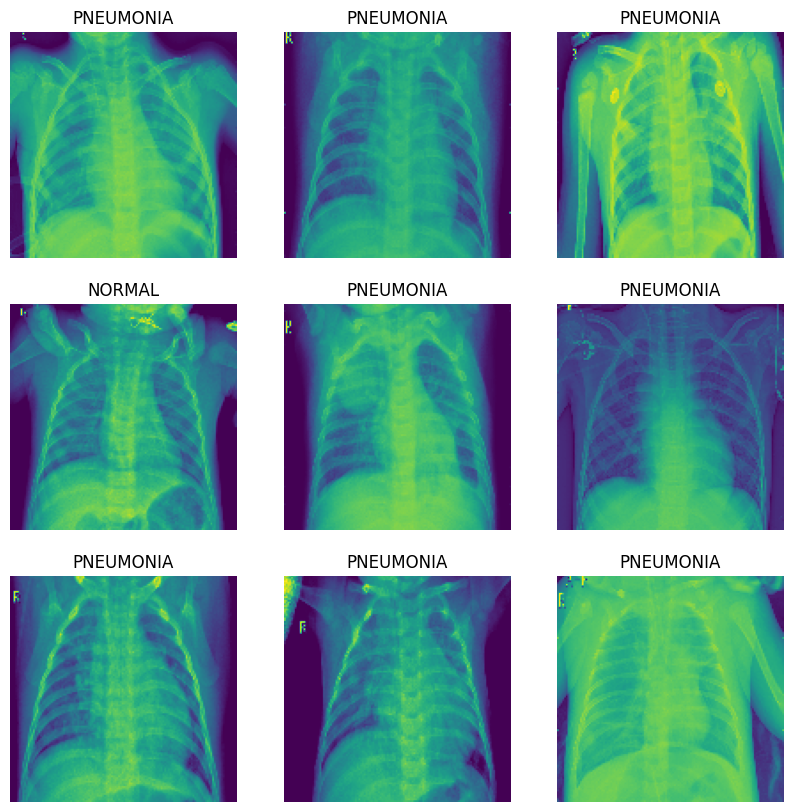

In [22]:
plt.figure(figsize=(10,10))
for images, lables in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
        plt.title(train_ds.class_names[lables[i]])
        plt.axis('off')

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
])

In [25]:
model.compile(
optimizer = 'adam',
loss = tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [26]:
epochs = 11

In [27]:
model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

Epoch 1/11
163/163 [==============================] - 56s 332ms/step - loss: 0.2496 - accuracy: 0.8982 - val_loss: 0.5571 - val_accuracy: 0.7500
Epoch 2/11
163/163 [==============================] - 44s 267ms/step - loss: 0.0994 - accuracy: 0.9628 - val_loss: 0.7587 - val_accuracy: 0.6875
Epoch 3/11
163/163 [==============================] - 44s 269ms/step - loss: 0.0826 - accuracy: 0.9693 - val_loss: 0.4164 - val_accuracy: 0.7500
Epoch 4/11
163/163 [==============================] - 43s 265ms/step - loss: 0.0665 - accuracy: 0.9764 - val_loss: 0.3971 - val_accuracy: 0.8125
Epoch 5/11
163/163 [==============================] - 43s 267ms/step - loss: 0.0613 - accuracy: 0.9774 - val_loss: 0.1353 - val_accuracy: 0.9375
Epoch 6/11
163/163 [==============================] - 43s 263ms/step - loss: 0.0472 - accuracy: 0.9824 - val_loss: 0.2022 - val_accuracy: 0.8750
Epoch 7/11
163/163 [==============================] - 43s 266ms/step - loss: 0.0389 - accuracy: 0.9858 - val_loss: 0.3290 - val_ac

In [28]:
model.evaluate(test_ds)

20/20 [==============================] - 3s 94ms/step - loss: 2.0816 - accuracy: 0.7612


[2.081557273864746, 0.7612179517745972]